In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot
from math import sqrt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pmd

In D:\ProgramFiles\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\ProgramFiles\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\ProgramFiles\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In D:\ProgramFiles\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\ProgramFiles\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.jpeg_quality rcparam was 

In [3]:
df = pd.read_csv("data_final.csv")
df = df[["y7"]]
df = df.rename(columns={'y7': 'actual_val'})

df_train=df[0:1450]
df_val=df[1450:1500]

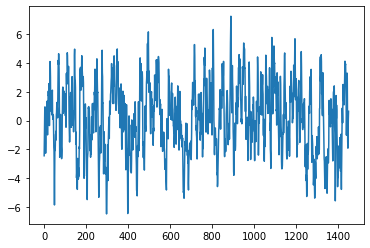

<Figure size 7200x1440 with 0 Axes>

In [7]:
plt.plot(df_train.index, df_train.actual_val)
figure(figsize=(100, 20), dpi=80)
plt.show()

In [8]:
#BURADA ACF ACF grafiğine baktığımızda geçmiş şokların etkisinin azaldığı, geçmişin hızla unutulduğu  görülmektedir. 
#Buna göre durağan olduğu söylenebilir. ADF birim kök testi ile durağan olup olmadığı belirlenecektir.

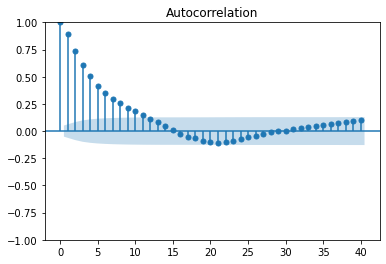

In [56]:
sm.graphics.tsa.plot_acf(df_train.values.squeeze(), lags=40)
plt.show()

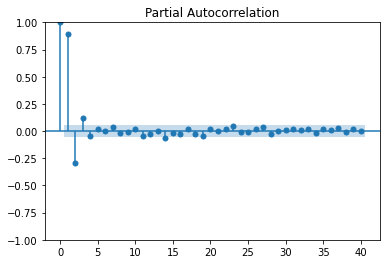

In [57]:
sm.graphics.tsa.plot_pacf(df_train.values.squeeze(), lags=40, method="ywm")
plt.show()

In [60]:
result = adfuller(df_train['actual_val'])
print('Augmented Dickey-Fuller Test:')
labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

for value,label in zip(result,labels):
    print(label+' : '+str(value) )
    
if result[1] <= 0.05:
    print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

Augmented Dickey-Fuller Test:
ADF Test Statistic : -10.244666603966603
p-value : 4.6513646971897865e-18
#Lags Used : 3
Number of Observations Used : 1446
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [18]:
#Ljung-Box Testi: zaman serisi olup olmadığnı anlamak için yapılacak, incelenecek

In [8]:
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(df_train["actual_val"], lags=[20], return_df=True)

,lb_stat,lb_pvalue
20,3706.806677,0.0


,lb_stat,lb_pvalue
20,3706.806677,0.0


In [21]:
### R'da x^2 değeri burada lb_stat olarak geçiyor. p value %5, anlamlılık düzeyinden daha az olduğu için bu datada zaman
### serisi vardır diyebiliriz. 

#Test, residual korelasyonuna bakıyor. 
#H0: absence of serial correlation
#Ha: existance of serial correlation
#p_val < alpha ==> H0 reddedilir

#ZAMAN SERİSİ OLDUĞU İÇİN ARMA MODELİ KULLANILABİLİYOR. 
#Akaike's Information Criterion

In [64]:
def arimamodel(timeseriesarray):
    autoarima_model = pmd.auto_arima(timeseriesarray, 
                              start_p=1, 
                              start_q=1,
                              test="adf",
                              trace=True)
    return autoarima_model

In [65]:
arima_model = arimamodel(df_train["actual_val"])
arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=4148.031, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=6587.780, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=4299.326, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=5206.118, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=6598.351, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=4149.665, Time=0.31 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=4149.676, Time=0.30 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=4654.401, Time=0.57 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=4172.223, Time=0.12 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=4150.242, Time=1.43 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=4147.098, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=5213.823, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=4297.976, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=4148.697, Time=0.16 sec
 ARIMA(1,0,2)(0,0,0)[0]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1450
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -2070.549
Date:                Sat, 29 Oct 2022   AIC                           4147.098
Time:                        08:09:53   BIC                           4162.936
Sample:                             0   HQIC                          4153.008
                               - 1450                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8225      0.017     47.639      0.000       0.789       0.856
ma.L1          0.3759      0.028     13.469      0.000       0.321       0.431
sigma2         1.0169      0.039     26.288      0.000       0.941       1.093
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 1.73
Prob(Q):                              0.81   Prob(JB):                         0.42
Heteroskedasticity (H):               1.03   Skew:                             0.07
Prob(H) (two-sided):                  0.73   Kurtosis:                         2.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

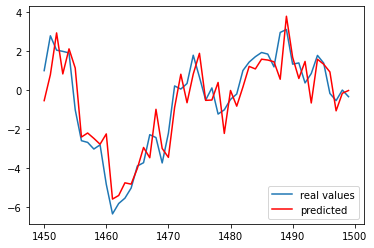

In [15]:
model = ARIMA(df_val, order=(1,0,1))

results = model.fit()

plt.plot(df[1450:1500], label= "real values")
plt.plot(results.fittedvalues, color='red', label='predicted')
plt.legend()


In [19]:
results_series = results.fittedvalues
results_df = pd.DataFrame({'prediction':results_series.values})
df_val.reset_index(drop= True,  inplace=True)
val_results_df=pd.concat([df_val,results_df], axis=1)

val_results_df["diff_actual_val"]=0
val_results_df["diff_prediction"]=0
val_results_df["evaluation"]=0

In [20]:
val_results_df.head()

,actual_val,prediction,diff_actual_val,diff_prediction,evaluation
0,1.002199,-0.534205,0,0,0
1,2.787295,0.798656,0,0,0
2,2.051013,2.935575,0,0,0
3,1.989426,0.834567,0,0,0
4,1.909431,2.118137,0,0,0


In [21]:
for i in range(len (val_results_df)-1) :
    val_results_df["diff_actual_val"].iloc[i]=val_results_df["actual_val"].iloc[i+1]-val_results_df["actual_val"].iloc[i]

for i in range(len (val_results_df)-1) :
    val_results_df["diff_prediction"].iloc[i]=val_results_df["prediction"].iloc[i+1]-val_results_df["prediction"].iloc[i]    
    
    
for i in range(len (val_results_df)-1):
    if val_results_df["diff_actual_val"].iloc[i]>0 and  val_results_df["diff_prediction"].iloc[i]>0 :
        val_results_df["evaluation"].iloc[i]=1
    elif val_results_df["diff_actual_val"].iloc[i]<0 and  val_results_df["diff_prediction"].iloc[i]<0 :
        val_results_df["evaluation"].iloc[i]=1
    else :
        val_results_df["evaluation"].iloc[i]=0    
    

D:\ProgramFiles\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [100]:
val_results_df

,actual_val,prediction,diff_actual_val,diff_prediction,evaluation
0,1.002199,-0.534205,1.785096,1.332861,1
1,2.787295,0.798656,-0.736282,2.136918,0
2,2.051013,2.935575,-0.061586,-2.101008,1
3,1.989426,0.834567,-0.079996,1.283571,0
4,1.909431,2.118137,-2.911947,-0.982734,1
5,-1.002516,1.135404,-1.582297,-3.532522,1
6,-2.584814,-2.397118,-0.087008,0.205643,0
7,-2.671822,-2.191475,-0.339831,-0.275189,1
8,-3.011653,-2.466664,0.214063,-0.299652,0
9,-2.797590,-2.766316,-2.020910,0.528397,0


In [101]:
sum(val_results_df.evaluation)

28

In [106]:
sum(val_results_df.evaluation)/(val_results_df.shape[0]-1)

0.5714285714285714

In [ ]:
#yazı turaya göre daha yii sonuç verdi

In [ ]:
#RMSE bulunması

In [85]:
döviz - reel faiz (zaman serisi)

In [ ]:
marmara kapital, haydar acun, haberler nasıl etkiliyor. (nlp + zaman serisi) 

In [ ]:
döviz kuru oynaklığı ve bist üzerindeki etkisi -- ders projesi
ocak
15
literatür taraması


In [89]:
val_results_df.head()

,Expected,Predicted
0,1.002199,-0.611632
1,2.787295,-0.611632
2,2.051013,-0.611632
3,1.989426,-0.611632
4,1.909431,-0.611632


In [91]:
rmse = sqrt(mean_squared_error(df_val, predictions_df))
print('Test RMSE: %.3f' % rmse)


#Test RMSE: 90.986

Test RMSE: 2.447
